In [85]:
import functions_class as fx
import classx as cl
import matplotlib.pyplot as plt
import numpy as np

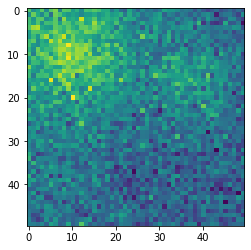

In [95]:
n_x         = 50
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)

x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.25
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)

plt.imshow(frank)
plt.plot()


frank = np.ravel(frank)

(2500,)
(50, 50)


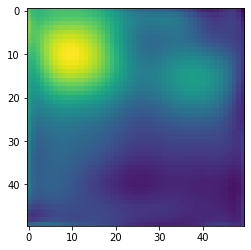

In [110]:
design = fx.DesignDesign(x,y,10)
data = frank
inverse_term   = np.linalg.inv(design.T.dot(design))
beta           = inverse_term.dot(design.T).dot(data)


prediction = design @ beta
print(prediction.shape)
pred = np.reshape(prediction,[n_x,n_x])
print(pred.shape)

plt.imshow(pred)
plt.show()

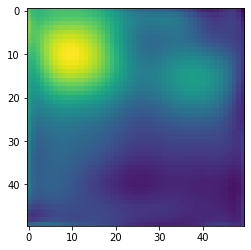

In [97]:
linreg = cl.OLS()
linreg.fit(des,frank)
pred_ols = linreg.predict(des)

plt.imshow(pred_ols.reshape([n_x,n_x]))
plt.show()

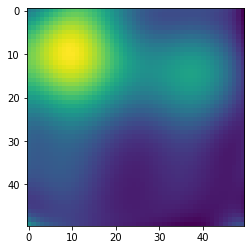

In [11]:
rid = cl.Ridge(_lambda=10e-07)
beta = rid.fit(des,frank)
pred_rid = rid.predict(des)

plt.imshow(pred_rid.reshape([n_x,n_x]))
plt.show()

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.24625378610013, tolerance: 0.07673845762096701
  positive)


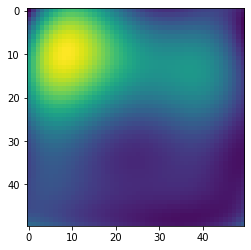

In [12]:
las = cl.Lasso_(_lambda=10e-07, intcept=False, max_it=10e4)
beta = las.fit(des[:,1:],frank)
pred_las = las.predict(des[:,1:])

plt.imshow(pred_las.reshape([n_x,n_x]))
plt.show()

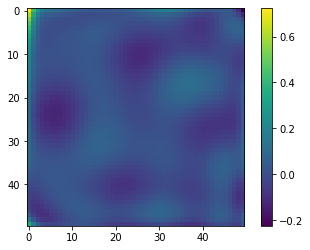

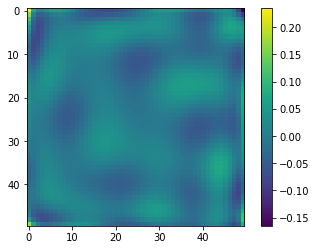

In [15]:
plt.imshow(pred_ols.reshape([n_x,n_x]) - pred_las.reshape([n_x,n_x]))
plt.colorbar()
plt.show()

plt.imshow(pred_ols.reshape([n_x,n_x]) - pred_rid.reshape([n_x,n_x]))
plt.colorbar()
plt.show()

In [34]:
import pandas as pd
import os
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


# Reading file into data frame
cwd = os.getcwd()
filename = cwd + '/cred_card.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)


df.rename(index=str, columns={"default payment next month": "defaultPaymentNextMonth"}, inplace=True)

# Features and targets 
X = df.loc[:, df.columns != 'defaultPaymentNextMonth'].values
y = df.loc[:, df.columns == 'defaultPaymentNextMonth'].values

# Categorical variables to one-hot's
onehotencoder = OneHotEncoder(categories="auto")

X = ColumnTransformer(
    [("", onehotencoder, [3]),],
    remainder="passthrough"
).fit_transform(X)

y.shape



(30000, 1)

In [51]:
edu = df.columns != 'defaultPaymentNextMonth'

print(edu)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False]


In [50]:
print(df.loc[:,df.columns==['PAY_5','BILL_AMT4']].values)

ValueError: Arrays were different lengths: 24 vs 2

In [1]:
import segyio
import numpy as np
import pandas as pd 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from ipywidgets import Button, Layout
from IPython.display import Javascript, display
import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk, filedialog

import traitlets
from IPython.display import display
from ipywidgets import widgets
from tkinter import Tk, filedialog


In [6]:
class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectFilesButton, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "select excel file"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.
        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
        
        
        

get_input = SelectFilesButton()

In [31]:
class SelectAttributes(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectAttributes, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "select excel file"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        # self.on_click(self.select_files)
    
    def keyattributes(self, filename):
        nanDict = {}
        frame = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)
        names = frame.columns
        
        for i in range(names.shape):
            super(SelectAttributes, self).__init__(*args, **kwargs)
            # Add the selected_files trait
            self.add_traits(files=traitlets.traitlets.List())
            # Create the button.
            self.description = "names[i]"
            self.icon = "square-o"
            self.style.button_color = "orange"

        
        
select = SelectAttributes()

In [10]:
display(get_input)

SelectFilesButton(description='Files Selected', icon='check-square-o', style=ButtonStyle(button_color='lightgr…

In [13]:
get_input.files[0]

'C:/Users/vemundst/Documents/PhD/courses/ML/FYS-STK4155/newprojects/Project2/cred_card.xls'

In [21]:
nanDict = {}
frame = pd.read_excel(get_input.files[0], header=1, skiprows=0, index_col=0, na_values=nanDict)

In [45]:
names = frame.columns

In [55]:
print(names[2])

EDUCATION


In [32]:
display(select)

SelectAttributes(description='select excel file', icon='square-o', style=ButtonStyle(button_color='orange'))

In [62]:
ting=widgets.Button().description = "select excel file"
widgets.Button.icon = "square-o"
widgets.Button.style.button_color = "orange"

In [63]:
display(ting)

'select excel file'

In [65]:
add_traits(files=traitlets.traitlets.List())

NameError: name 'add_traits' is not defined